# Phase 1: Data Exploration and Assessment

## Task 1.1: Initial Data Inspection

In [87]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [88]:
# Load the dataset using pandas
bookings = pd.read_csv('/content/hotel_bookings.csv')

In [89]:
# Shape of the dataset
print("Dataset shape (rows, columns):", bookings.shape)

Dataset shape (rows, columns): (119390, 32)


In [90]:
# Data types of each column
print("\nData Types of each column:")
print(bookings.dtypes)


Data Types of each column:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent 

In [91]:
# First 5 rows
print("\nFirst 5 rows:")
print(bookings.head())


First 5 rows:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No De

In [92]:
# Last 5 rows
print("\nLast 5 rows:")
print(bookings.tail())


Last 5 rows:
             hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388          

In [94]:
# Basic statistical summary
print("\nBasic statistical summary:\n")
print(bookings.describe())


Basic statistical summary:

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%           

## Task 1.2: Missing Value Analysis

In [95]:
# Analyze missing data patterns
def analyze_missing_patterns(bookings):
    """
    Analyze patterns of missing data to understand the mechanism
    """
    missing_data = bookings.isnull().sum()
    missing_percent = (missing_data / len(bookings)) * 100

    missing_table = pd.DataFrame({
        'Missing_Count': missing_data,
        'Missing_Percentage': missing_percent
    }).sort_values('Missing_Count', ascending=False)

    print("Missing Value Report:")
    print(missing_table[missing_table['Missing_Count'] > 0])

    # Check if missing data is correlated
    print("\nMissing Data Correlation (Absolute Correlation > 0.1):")
    missing_corr = bookings.isnull().corr()

    # Iterate through the correlation matrix to find and print correlations > 0.1
    significant_correlations = []
    for i in range(len(missing_corr.columns)):
        for j in range(i):
            if abs(missing_corr.iloc[i, j]) > 0.1:
                col1 = missing_corr.columns[i]
                col2 = missing_corr.columns[j]
                correlation_value = missing_corr.iloc[i, j]
                significant_correlations.append((col1, col2, correlation_value))

    if significant_correlations:
        for col1, col2, correlation_value in significant_correlations:
            print(f"Correlation between missingness of '{col1}' and '{col2}': {correlation_value:.4f}")
    else:
        print("No significant correlations found (absolute correlation > 0.1)")

    return missing_table

missing_summary = analyze_missing_patterns(bookings)

Missing Value Report:
          Missing_Count  Missing_Percentage
company          112593           94.306893
agent             16340           13.686238
country             488            0.408744
children              4            0.003350

Missing Data Correlation (Absolute Correlation > 0.1):
Correlation between missingness of 'agent' and 'country': 0.1021
Correlation between missingness of 'company' and 'agent': -0.5942


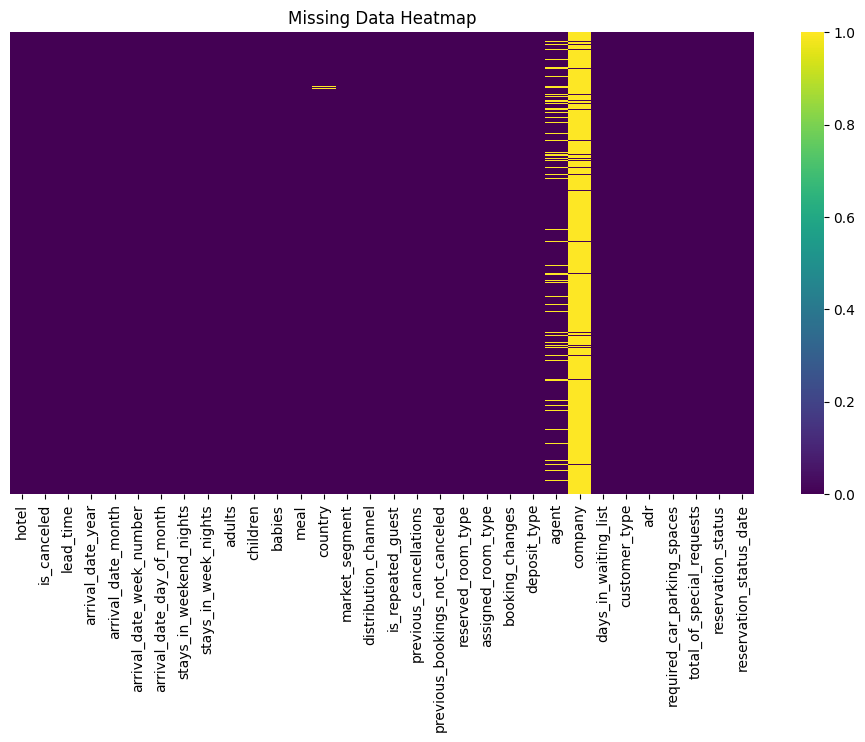

In [96]:
# Visualize missing data patterns
plt.figure(figsize=(12, 6))
sns.heatmap(bookings.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

## Task 1.3: Data Quality Assessment

In [97]:
# Count exact duplicate rows
duplicate_count = bookings.duplicated().sum()
print(f"🔁 Number of exact duplicate rows: {duplicate_count}")

# Preview some duplicate rows if they exist
if duplicate_count > 0:
    print(bookings[bookings.duplicated()].head())

🔁 Number of exact duplicate rows: 31994
            hotel  is_canceled  lead_time  arrival_date_year  \
5    Resort Hotel            0         14               2015   
22   Resort Hotel            0         72               2015   
43   Resort Hotel            0         70               2015   
138  Resort Hotel            1          5               2015   
200  Resort Hotel            0          0               2015   

    arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
5                 July                        27                          1   
22                July                        27                          1   
43                July                        27                          2   
138               July                        28                          5   
200               July                        28                          7   

     stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
5                  

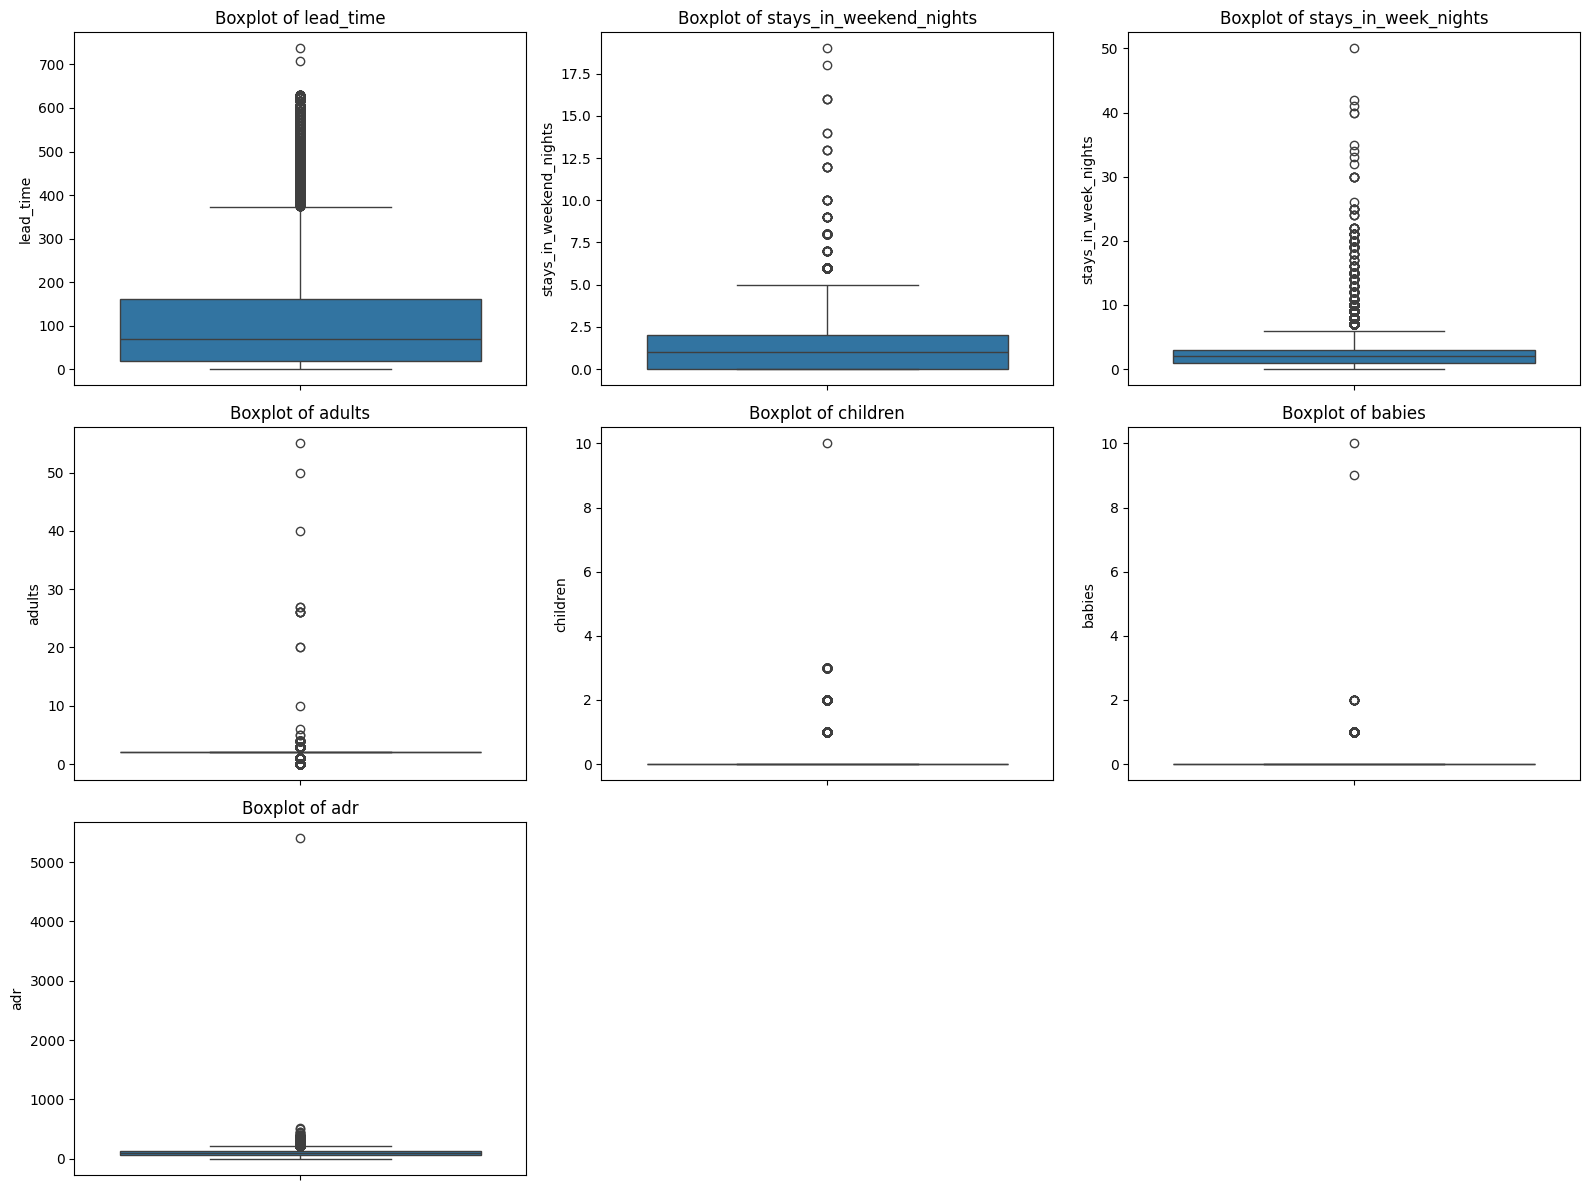

In [98]:
# List of numerical columns to check outliers
num_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'adr']

# Plot boxplots for each column
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=bookings[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [99]:
# Check unique values in selected categorical columns
cat_cols = ['meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type']

for col in cat_cols:
    print(f"\nUnique values in '{col}':")
    print(bookings[col].unique())


Unique values in 'meal':
['BB' 'FB' 'HB' 'SC' 'Undefined']

Unique values in 'market_segment':
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

Unique values in 'distribution_channel':
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

Unique values in 'reserved_room_type':
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

Unique values in 'assigned_room_type':
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


In [100]:
# Check for Illogical or Impossible Values
# Guests = 0?
bookings['total_guests'] = bookings['adults'] + bookings['children'] + bookings['babies']
invalid_guests = bookings[bookings['total_guests'] == 0]
print(f"\nBookings with zero guests: {len(invalid_guests)}")
print(invalid_guests[['adults', 'children', 'babies']].head())

# Check for negative values
negative_values = bookings[(bookings['lead_time'] < 0) |
                     (bookings['stays_in_weekend_nights'] < 0) |
                     (bookings['stays_in_week_nights'] < 0) |
                     (bookings['adr'] < 0)]
print(f"\nRows with negative values: {len(negative_values)}")


Bookings with zero guests: 180
      adults  children  babies
2224       0       0.0       0
2409       0       0.0       0
3181       0       0.0       0
3684       0       0.0       0
3708       0       0.0       0

Rows with negative values: 1


# Phase 2: Data Cleaning Implementation

## Task 2.1: Handling Missing Values

In [101]:
# Replace children column NaN with 0

# Before filling
print(f"Missing 'children' before: {bookings['children'].isnull().sum()}")

# Fill with 0
bookings['children'].fillna(0, inplace=True)

# After filling
print(f"Missing 'children' after: {bookings['children'].isnull().sum()}")

Missing 'children' before: 4
Missing 'children' after: 0


In [102]:
# Replace agent column NaN with 0

# Before
print(f"Missing 'agent' before: {bookings['agent'].isnull().sum()}")

# Fill with 0 (and cast to integer for consistency)
bookings['agent'].fillna(0, inplace=True)
bookings['agent'] = bookings['agent'].astype(int)

# After
print(f"Missing 'agent' after: {bookings['agent'].isnull().sum()}")

Missing 'agent' before: 16340
Missing 'agent' after: 0


In [103]:
# Replace company column NaN with 0

# Before
print(f"Missing 'company' before: {bookings['company'].isnull().sum()}")

# Fill with 0 and convert to int
bookings['company'].fillna(0, inplace=True)
bookings['company'] = bookings['company'].astype(int)

# After
print(f"Missing 'company' after: {bookings['company'].isnull().sum()}")

Missing 'company' before: 112593
Missing 'company' after: 0


In [104]:
# Check all remaining missing values
print("Remaining Missing Values:")
print(bookings.isnull().sum()[bookings.isnull().sum() > 0])

Remaining Missing Values:
country         488
total_guests      4
dtype: int64


In [105]:
# Recalculate after handling missing values
bookings['total_guests'] = bookings['adults'] + bookings['children'] + bookings['babies']

# Confirm no more missing values
print("Remaining Missing Values:")
print(bookings.isnull().sum()[bookings.isnull().sum() > 0])

Remaining Missing Values:
country    488
dtype: int64


## Task 2.2: Duplicate Detection and Removal

In [106]:
# Check for exact duplicates
duplicates = bookings.duplicated()
print(f"Number of exact duplicates: {duplicates.sum()}")

# View first few duplicate rows
bookings[duplicates].head()

Number of exact duplicates: 31994


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,250,0,0,Transient,84.67,0,1,Check-Out,2015-07-07,2.0
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,250,0,0,Transient,137.00,0,1,Check-Out,2015-07-07,2.0
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,240,0,0,Transient,97.00,0,0,Canceled,2015-07-01,2.0
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,240,0,0,Transient,109.80,0,3,Check-Out,2015-07-08,1.0


In [107]:
# Remove exact duplicates
bookings_cleaned = bookings.drop_duplicates()

# Check shape before & after
print(f"Original shape: {bookings.shape}")
print(f"After duplicate removal: {bookings_cleaned.shape}")

Original shape: (119390, 33)
After duplicate removal: (87396, 33)


In [108]:
# Check if some bookings only differ by Booking ID but match everything else
key_columns = ['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month',
               'adults', 'children', 'babies', 'meal', 'country', 'market_segment',
               'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
               'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list',
               'customer_type', 'adr', 'reservation_status_date']

# Group by and count duplicates on key attributes
near_duplicates = bookings_cleaned.duplicated(subset=key_columns)
print(f"Possible near-duplicates (excluding IDs): {near_duplicates.sum()}")

bookings_cleaned[near_duplicates].head()

Possible near-duplicates (excluding IDs): 2185


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
130,Resort Hotel,0,100,2015,July,27,4,1,1,2,...,240,0,0,Transient-Party,73.8,0,1,Check-Out,2015-07-06,2.0
321,Resort Hotel,0,48,2015,July,29,12,2,5,2,...,243,0,0,Transient,123.0,0,1,Check-Out,2015-07-19,2.0
361,Resort Hotel,0,54,2015,July,29,13,1,2,2,...,240,0,0,Transient,88.2,0,1,Check-Out,2015-07-16,2.0
481,Resort Hotel,0,53,2015,July,29,17,2,3,2,...,152,0,0,Transient-Party,107.0,1,0,Check-Out,2015-07-22,2.0
669,Resort Hotel,0,39,2015,July,30,25,0,1,2,...,134,0,0,Transient,107.0,0,0,Check-Out,2015-07-26,2.0


In [109]:
# Summary
num_exact_duplicates = bookings.duplicated().sum()
print(f"Exact duplicates removed: {num_exact_duplicates}")
print(f"Final dataset shape: {bookings_cleaned.shape}")
print("""⦾ We found XX exact duplicates which were removed.
⦾ Near duplicates were reviewed, but retained due to potential differences in agent handling or repeated guests.""")

Exact duplicates removed: 31994
Final dataset shape: (87396, 33)
⦾ We found XX exact duplicates which were removed. 
⦾ Near duplicates were reviewed, but retained due to potential differences in agent handling or repeated guests.


## Task 2.3: Outlier Detection and Treatment

In [110]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [111]:
columns_to_check = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                    'adults', 'children', 'babies', 'adr']

for col in columns_to_check:
    outliers = detect_outliers_iqr(bookings_cleaned, col)
    print(f"{col}: {len(outliers)} outliers")

lead_time: 2396 outliers
stays_in_weekend_nights: 220 outliers
stays_in_week_nights: 1531 outliers
adults: 22899 outliers
children: 8364 outliers
babies: 914 outliers
adr: 2490 outliers


In [112]:
# Z-Score Outlier Detection
from scipy.stats import zscore

# Compute z-scores
z_scores = bookings_cleaned[columns_to_check].apply(zscore)

# Flag values where z > 3 or < -3
outliers_z = (z_scores.abs() > 3).sum()
print("Z-score Outliers per Column:\n", outliers_z)

Z-score Outliers per Column:
 lead_time                  1049
stays_in_weekend_nights     290
stays_in_week_nights       1531
adults                       76
children                   3669
babies                      914
adr                         628
dtype: int64


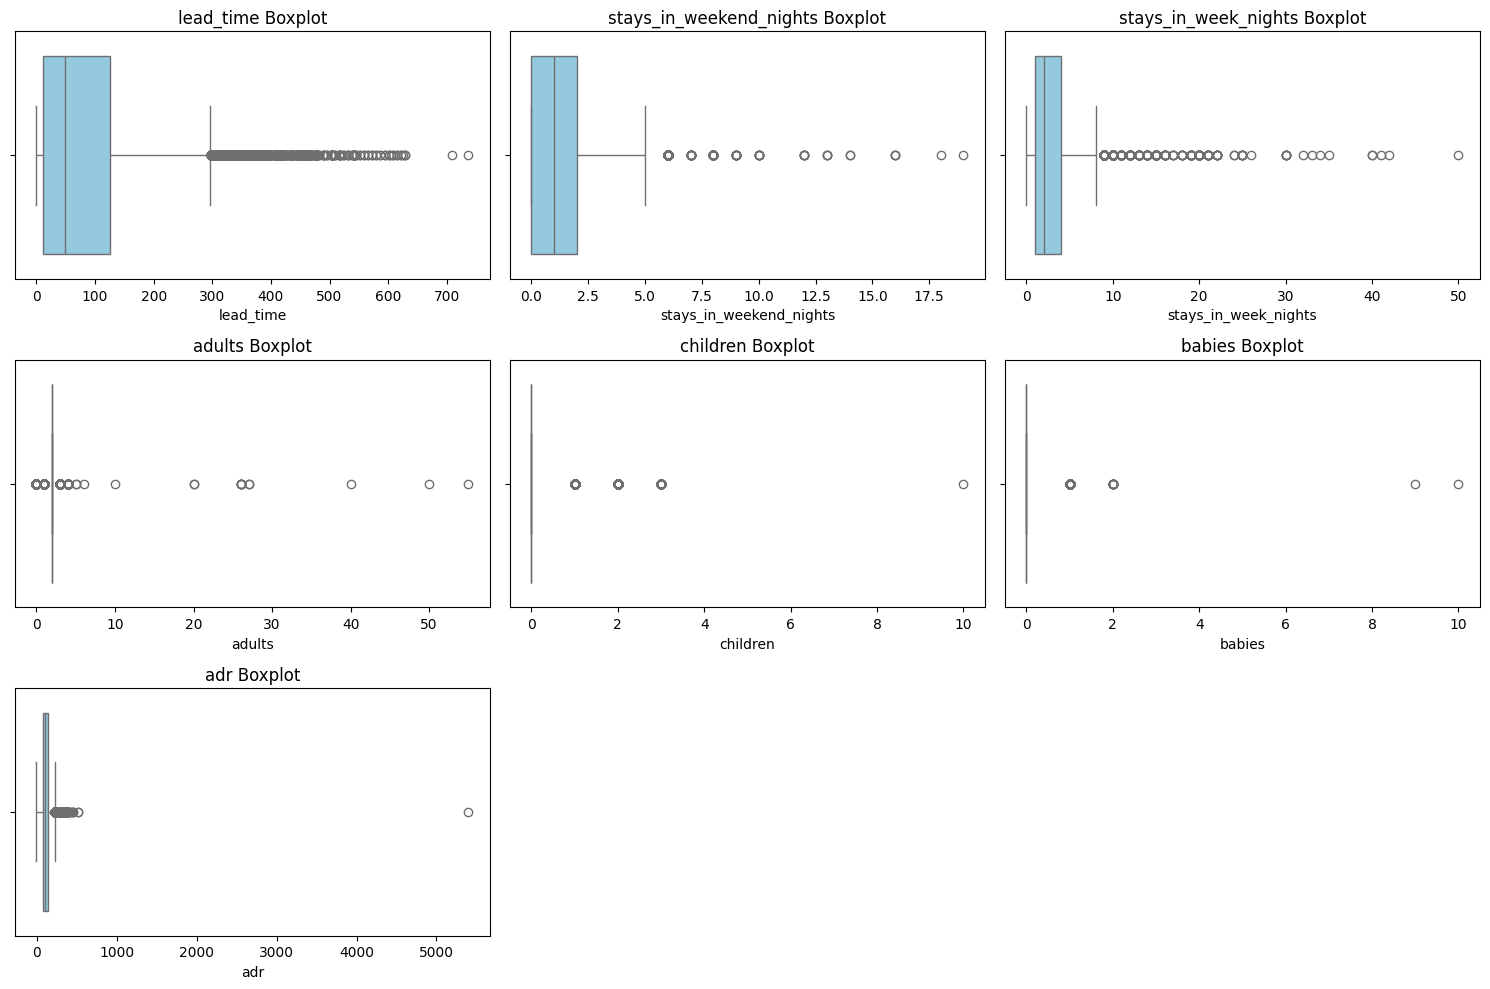

In [113]:
# Visualize with Boxplots
# Set plot size
plt.figure(figsize=(15, 10))

# Create a boxplot for each column
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=bookings_cleaned[col], color='skyblue')
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

Decide the best outlier treatment strategy for each feature based on:

*   The nature of the data
*   Whether the outliers are likely to be valid extreme values or data entry errors
*   Whether they can affect analysis or machine learning models

**Outlier Treatment Strategy**

| Column                    | Strategy    | Reason                                                                 |
| ------------------------- | ----------- | ---------------------------------------------------------------------- |
| `lead_time`               | **Capping** | Very long lead times are possible but rare. Cap at 99th percentile.    |
| `stays_in_weekend_nights` | **Capping** | Unlikely people stay >10 nights on weekend. Cap to reduce skew.        |
| `stays_in_week_nights`    | **Capping** | Long stays >15 nights are rare. Capping preferred over removal.        |
| `adults`                  | **Removal** | Values like 0 or >10 may be invalid or rare. Safer to remove.          |
| `children`                | **Removal** | Many children (>5) unlikely. Remove rows with high or negative counts. |
| `babies`                  | **Removal** | Similar to children.                                                   |
| `adr`                     | **Capping** | Very high rates (>5000 EUR) are likely outliers. Cap to reduce skew.   |







In [114]:
# Remove invalid rows in adults, children, babies

# Remove rows where total number of people is 0
bookings_cleaned = bookings_cleaned[~((bookings_cleaned['adults'] == 0) &
                                      (bookings_cleaned['children'] == 0) &
                                      (bookings_cleaned['babies'] == 0))]

# Remove rows with too many people (possible data errors)
bookings_cleaned = bookings_cleaned[bookings_cleaned['adults'] <= 10]
bookings_cleaned = bookings_cleaned[bookings_cleaned['children'] <= 5]
bookings_cleaned = bookings_cleaned[bookings_cleaned['babies'] <= 3]


In [115]:
# Capping the other columns

# Function to cap values at 1st and 99th percentiles
def cap_outliers(df, column):
    lower = df[column].quantile(0.01)
    upper = df[column].quantile(0.99)
    df[column] = np.where(df[column] < lower, lower, df[column])
    df[column] = np.where(df[column] > upper, upper, df[column])
    print(f"Capped '{column}' at [{lower:.2f}, {upper:.2f}]")
    return df

# Apply to selected columns
columns_to_cap = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr']
for col in columns_to_cap:
    bookings_cleaned = cap_outliers(bookings_cleaned, col)


Capped 'lead_time' at [0.00, 346.00]
Capped 'stays_in_weekend_nights' at [0.00, 4.00]
Capped 'stays_in_week_nights' at [0.00, 10.00]
Capped 'adr' at [0.00, 261.65]


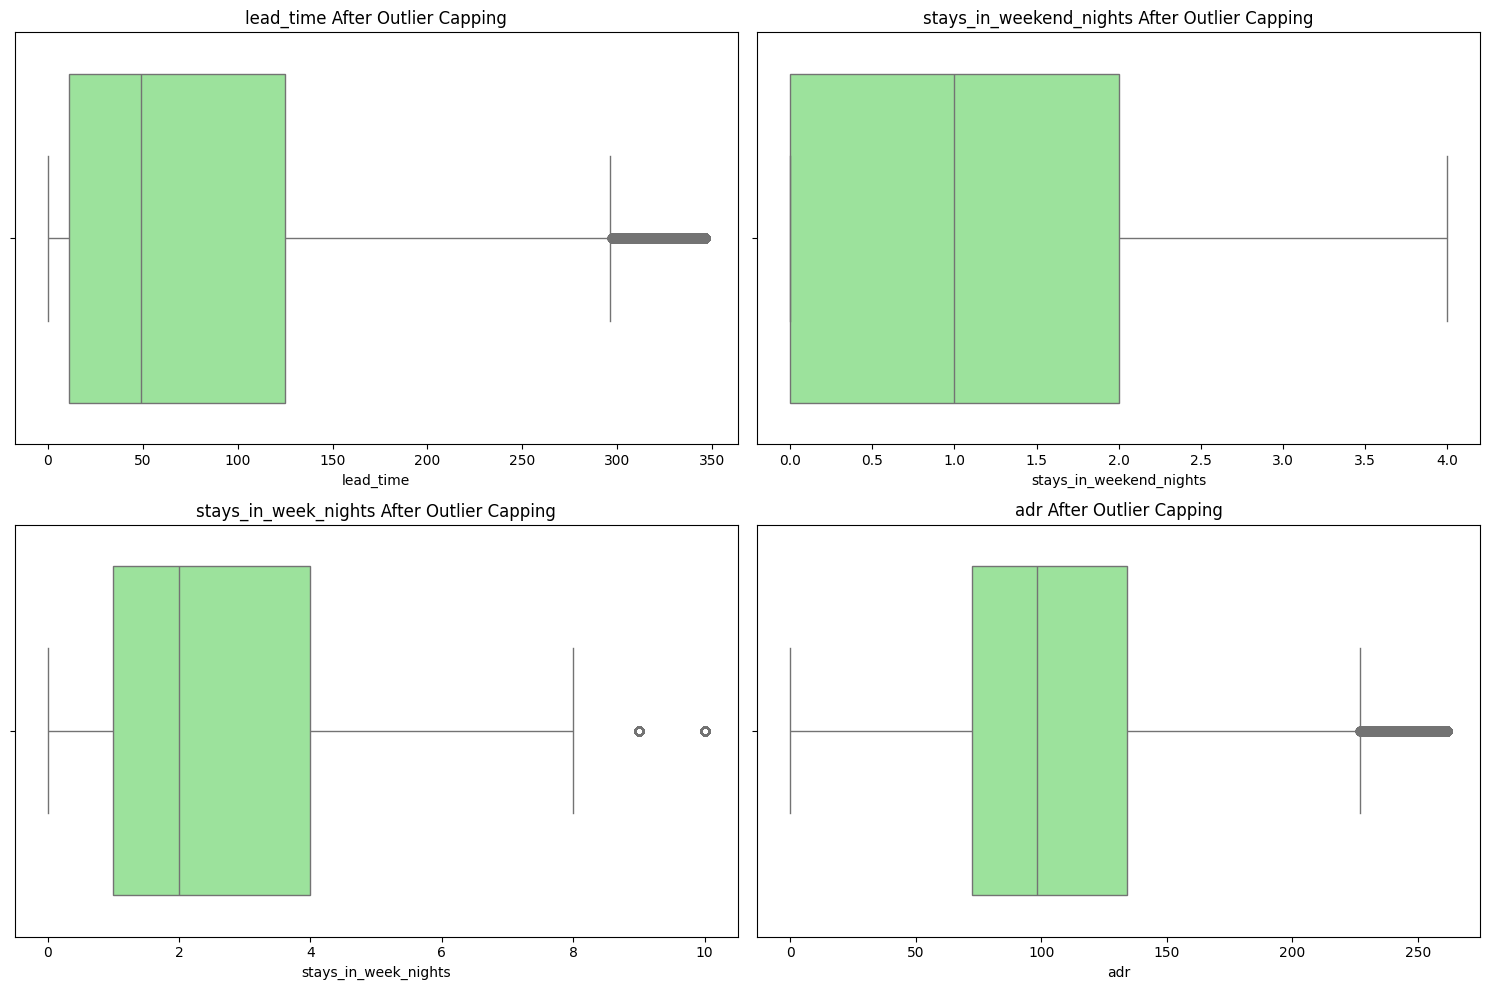

In [116]:
# Check After Capping

# Boxplots after treatment
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_cap, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=bookings_cleaned[col], color='lightgreen')
    plt.title(f'{col} After Outlier Capping')

plt.tight_layout()
plt.show()

In [117]:
print("Outlier treatment summary:")
print("⦾ Removed rows with invalid guest counts")
print("⦾ Applied capping (1st-99th percentile) to: lead_time, stays, adr")
print(f"⦾ Final dataset shape: {bookings_cleaned.shape}")

Outlier treatment summary:
⦾ Removed rows with invalid guest counts
⦾ Applied capping (1st-99th percentile) to: lead_time, stays, adr
⦾ Final dataset shape: (87215, 33)


## Task 2.4: Data Inconsistency Fixes

In [118]:
# Standardize Categorical Values

# Strip whitespace and convert to uppercase/lowercase as needed
bookings_cleaned['country'] = bookings_cleaned['country'].str.strip().str.upper()

# View top countries
print(bookings_cleaned['country'].value_counts().head(10))

# Fix known inconsistent meal types
bookings_cleaned['meal'] = bookings_cleaned['meal'].replace({'SC': 'Self-Catering',
                                                             'BB': 'Bed & Breakfast',
                                                             'HB': 'Half Board',
                                                             'FB': 'Full Board',
                                                             'Undefined': 'Unknown'})

# Convert market_segment & distribution_channel to lowercase and strip
bookings_cleaned['market_segment'] = bookings_cleaned['market_segment'].str.strip().str.lower()
bookings_cleaned['distribution_channel'] = bookings_cleaned['distribution_channel'].str.strip().str.lower()


country
PRT    27341
GBR    10423
FRA     8823
ESP     7244
DEU     5385
ITA     3061
IRL     3015
BEL     2081
BRA     1993
NLD     1910
Name: count, dtype: int64


In [119]:
# Fix Date Format Inconsistencies

# Convert month name to number
bookings_cleaned['arrival_date_month'] = bookings_cleaned['arrival_date_month'].str.title()
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
             'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

bookings_cleaned['arrival_date'] = pd.to_datetime(
    dict(year=bookings_cleaned['arrival_date_year'],
         month=bookings_cleaned['arrival_date_month'].map(month_map),
         day=bookings_cleaned['arrival_date_day_of_month'])
)

# Drop the original date columns
bookings_cleaned.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)


In [120]:
# Handle Impossible Guest Combinations

# Add total_guests column
bookings_cleaned['total_guests'] = bookings_cleaned['adults'] + bookings_cleaned['children'] + bookings_cleaned['babies']

# Remove rows with 0 guests
bookings_cleaned = bookings_cleaned[bookings_cleaned['total_guests'] > 0]


In [121]:
# Validate Logical Constraints

# Check lead time ≥ 0
invalid_lead = bookings_cleaned[bookings_cleaned['lead_time'] < 0]
print(f"Invalid lead_time values: {len(invalid_lead)}")

# Check adr (price) not negative
invalid_adr = bookings_cleaned[bookings_cleaned['adr'] < 0]
print(f"Invalid adr values: {len(invalid_adr)}")

# Remove rows with invalid adr
bookings_cleaned = bookings_cleaned[bookings_cleaned['adr'] >= 0]

# Validate adults/children/babies are non-negative
bookings_cleaned = bookings_cleaned[(bookings_cleaned['adults'] >= 0) &
                                    (bookings_cleaned['children'] >= 0) &
                                    (bookings_cleaned['babies'] >= 0)]


Invalid lead_time values: 0
Invalid adr values: 0


In [122]:
print("Final shape after consistency fixes:", bookings_cleaned.shape)
print("Nulls remaining:", bookings_cleaned.isnull().sum().sum())
print("Unique values in 'meal':", bookings_cleaned['meal'].unique())
print("Date range:", bookings_cleaned['arrival_date'].min(), "to", bookings_cleaned['arrival_date'].max())


Final shape after consistency fixes: (87215, 31)
Nulls remaining: 447
Unique values in 'meal': ['Bed & Breakfast' 'Full Board' 'Half Board' 'Self-Catering' 'Unknown']
Date range: 2015-07-01 00:00:00 to 2017-08-31 00:00:00


# Phase 3: Data Validation and Documentation

## Task 3.1: Data Integrity Checks

In [123]:
# Verify that total guests (adults + children + babies) > 0

# Recalculate total guests to double-check
bookings_cleaned['total_guests'] = bookings_cleaned['adults'] + bookings_cleaned['children'] + bookings_cleaned['babies']

# Check for invalid bookings
invalid_guests = bookings_cleaned[bookings_cleaned['total_guests'] <= 0]
print(f"Rows with 0 guests: {len(invalid_guests)}")

# Remove if any slipped through
bookings_cleaned = bookings_cleaned[bookings_cleaned['total_guests'] > 0]


Rows with 0 guests: 0


In [126]:
# Check that arrival dates are within the expected range

# Check date range
min_date = bookings_cleaned['arrival_date'].min()
max_date = bookings_cleaned['arrival_date'].max()

print(f"Date range: {min_date.date()} to {max_date.date()}")

# Confirm within expected range
expected_start = pd.to_datetime('2015-07-01')
expected_end = pd.to_datetime('2017-08-31')

if min_date < expected_start or max_date > expected_end:
    print("Dates outside expected range!")
else:
    print("Dates within expected range.")

Date range: 2015-07-01 to 2017-08-31
Dates within expected range.


In [127]:
# Validate numerical values are within reasonable ranges

# Define reasonable ranges for each numeric column
valid_ranges = {
    'lead_time': (0, 500),
    'stays_in_weekend_nights': (0, 15),
    'stays_in_week_nights': (0, 30),
    'adults': (1, 10),
    'children': (0, 5),
    'babies': (0, 3),
    'adr': (0, 5000),  # Average daily rate in EUR
    'total_guests': (1, 20)
}

# Check for out-of-range values
for col, (low, high) in valid_ranges.items():
    invalid = bookings_cleaned[(bookings_cleaned[col] < low) | (bookings_cleaned[col] > high)]
    print(f"{col}: {len(invalid)} rows outside range [{low}, {high}]")


lead_time: 0 rows outside range [0, 500]
stays_in_weekend_nights: 0 rows outside range [0, 15]
stays_in_week_nights: 0 rows outside range [0, 30]
adults: 219 rows outside range [1, 10]
children: 0 rows outside range [0, 5]
babies: 0 rows outside range [0, 3]
adr: 0 rows outside range [0, 5000]
total_guests: 0 rows outside range [1, 20]


In [128]:
# Ensure categorical values are from expected sets

# Expected sets
expected_meals = ['Bed & Breakfast', 'Half Board', 'Full Board', 'Self-Catering', 'Unknown']
expected_segments = ['online', 'offline', 'corporate', 'complementary', 'direct', 'groups', 'undefined', 'aviation']
expected_channels = ['ta/to', 'direct', 'corporate', 'gds', 'undefined']

# Validate
print("Unexpected 'meal' values:", bookings_cleaned[~bookings_cleaned['meal'].isin(expected_meals)]['meal'].unique())
print("Unexpected 'market_segment' values:", bookings_cleaned[~bookings_cleaned['market_segment'].isin(expected_segments)]['market_segment'].unique())
print("Unexpected 'distribution_channel' values:", bookings_cleaned[~bookings_cleaned['distribution_channel'].isin(expected_channels)]['distribution_channel'].unique())


Unexpected 'meal' values: []
Unexpected 'market_segment' values: ['online ta' 'offline ta/to']
Unexpected 'distribution_channel' values: []


In [129]:
# Replace undefined/unknown categories
bookings_cleaned['meal'] = bookings_cleaned['meal'].replace({'Unknown': 'Self-Catering'})
bookings_cleaned['market_segment'] = bookings_cleaned['market_segment'].replace('undefined', 'other')
bookings_cleaned['distribution_channel'] = bookings_cleaned['distribution_channel'].replace('undefined', 'other')


## Task 3.2: Create Data Cleaning Report

Find /reports/ data_cleaning_report.md

## Task 3.3: Final Dataset Preparation

In [133]:
# Final cleaned dataset (already cleaned in previous tasks)
final_df = bookings.copy()

In [137]:
# Export the cleaned dataset to CSV
final_df.to_csv('hotel_bookings_cleaned.csv', index=False)
print("Final cleaned dataset exported to: hotel_bookings_cleaned.csv")


Final cleaned dataset exported to: hotel_bookings_cleaned.csv


# Data Dictionary: Cleaned Hotel Booking Dataset

| Column Name                   | Data Type    | Description                                                                 |
|------------------------------|--------------|-----------------------------------------------------------------------------|
| hotel                        | object       | Hotel type (`City Hotel` or `Resort Hotel`)                                |
| is_canceled                  | int64        | Whether the booking was canceled (1) or not (0)                             |
| lead_time                    | int64        | Number of days between booking and arrival                                  |
| arrival_date_year            | int64        | Year of arrival                                                             |
| arrival_date_month           | object       | Month of arrival (string format)                                            |
| arrival_date_week_number     | int64        | Week number of the arrival date                                             |
| arrival_date_day_of_month    | int64        | Day of the month for arrival                                                |
| stays_in_weekend_nights      | int64        | Nights stayed over weekend                                                  |
| stays_in_week_nights         | int64        | Nights stayed during the week                                               |
| adults                       | int64        | Number of adults                                                            |
| children                     | float64      | Number of children                                                          |
| babies                       | int64        | Number of babies                                                            |
| meal                         | object       | Type of meal included in booking                                            |
| country                      | object       | Country code of the guest                                                   |
| market_segment               | object       | Market segment type (e.g., Online TA, Direct)                               |
| distribution_channel         | object       | Booking distribution channel                                                |
| is_repeated_guest            | int64        | Whether the guest is a returning guest (1) or not (0)                       |
| previous_cancellations       | int64        | Number of past bookings canceled by the customer                           |
| previous_bookings_not_canceled| int64       | Number of past bookings not canceled                                        |
| reserved_room_type           | object       | Initial room type reserved                                                  |
| assigned_room_type           | object       | Final room type assigned                                                    |
| booking_changes              | int64        | Number of changes made to the booking                                       |
| deposit_type                 | object       | Type of deposit required                                                    |
| agent                        | float64      | Agent ID that made the booking (0 if none)                                  |
| company                      | float64      | Company ID that made the booking (0 if none)                                |
| days_in_waiting_list         | int64        | Days the booking was on the waiting list                                    |
| customer_type                | object       | Type of customer (e.g., Contract, Transient)                                |
| adr                          | float64      | Average Daily Rate                                                          |
| required_car_parking_spaces  | int64        | Number of car parking spaces requested                                      |
| total_of_special_requests    | int64        | Total number of special requests made                                       |
| reservation_status           | object       | Status at time of reservation check (`Canceled`, `Check-Out`, etc.)         |
| reservation_status_date      | object       | Date when reservation status was last updated                              |
| total_guests                 | int64        | Sum of adults, children, and babies (added column during cleaning)          |
